In [20]:
import numpy as np # scienfitic computation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm # progress bar

from skimage import io, transform # enables image processing
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

import os

In [21]:
path = 'C:/Users/Dewan/Desktop/tuberculosis/'
#path1 = path + 'ChinaSet_AllFiles/'
os.listdir(path)

['clinicalreadings', 'x-rays']

normal
normal
normal 
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal

normal
normal
normal
normal
normal
normal
normal 
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal


normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal

normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal


norma

Right PTB 	
left PTB 	
left PTB 	
left PTB 	
bilateral PTB 	
Right PTB 	
left PTB 	
left PTB 	
bilateral PTB 	
left PTB 	
secondary PTB  in the left upper field 	
bilateral secondary PTB 	
secondary PTB  in the bilateral upper fields 	
right lower field PTB 	
left PTB 	
secondary PTB  in the left upper field 	
bilateral PTB 	
right lower field PTB 	
bilateral PTB 	
Right PTB 	
bilateral PTB, right pleurisy 	
Right PTB 	
bilateral subacute hematogenous disseminated PTB 	
left PTB 	
bilateral PTB 	
bilateral PTB 	
Right PTB 	
left PTB 	
bilateral PTB 	
left PTB 	
left PTB 	
PTB in the left upper field 	
Bilateral secondary PTB   	
PTB in the right upper field 	
right secondary PTB   	
Old PTB in the right upper field 	
PTB in the right upper field 	
PTB in the right upper field 	
PTB in the right upper field 	
Right PTB 	
bilateral PTB 	
PTB in the left upper field 	
PTB in the right upper field 	
Right PTB 	
left PTB 	
PTB in the right upper field 	
PTB in the left upper field 	
PTB in 

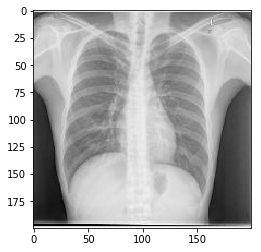

In [22]:
path_base = os.listdir(path + 'x-rays') # path of the x-ray files
path_base2= os.listdir(path + 'clinicalreadings') # path of the cilinical readings

for file in path_base2:
    
    f = open(path + "clinicalreadings/" + file, 'r')
    cxr_data = f.read()
    cxr_data_list = cxr_data.split("\n")
    cxr_data_list = cxr_data_list[-1]
    print(cxr_data_list)
    
img_path = 'C:/Users/Dewan/Desktop/tuberculosis/x-rays/CHNCXR_0183_0.jpg'

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()

In [23]:
img_dir = path
cxr_dir2 = path

print(os.listdir(img_dir))
print(os.listdir(cxr_dir2))

['clinicalreadings', 'x-rays']
['clinicalreadings', 'x-rays']


In [24]:
def load_data(image_dir, cxr_dir2):
    
    p = []
    q = []
    
    labels = []
    idx = 0
    
    for i, document_name in enumerate(os.listdir(image_dir)):
        if document_name in ("x-rays"):
            for folder_name in tqdm(os.listdir(f'{image_dir}/{document_name}')):
                if folder_name.endswith('jpg'):
                    #print(file_name)
                    
                    f = open(image_dir + "ClinicalReadings/" + folder_name[:-4] + '.txt','r') 
                    
                    cxr_data = f.read()
                    cxr_data_list = cxr_data.split("\n")
                    cxr_data_list = cxr_data_list[-1]
                    if "Pulmonary TB" in cxr_data_list:
                        cxr_data_list = "Pulmonary TB"
                    elif "normal" in cxr_data_list:
                        cxr_data_list = "normal"
                    #print (cxr_data_list)
                    if cxr_data_list not in labels:
                        labels.append(cxr_data_list)
                    im = cv2.imread(f'{image_dir}/{document_name}/{folder_name}')
                    
                    if im is not None:
                        im = cv2.resize(im, (100, 100))
                        p.append(im)
                        q.append(labels.index(cxr_data_list))
                        
    p = np.asarray(p)
    q = np.asarray(q)
    labels = np.asarray(labels)
    return p, q, labels

 

In [25]:
def load_data1(image_dir2):
    
    p = []
    q = []
    labels = []
    idx = 2
    
    for i, document_name in enumerate(os.listdir(image_dir2)): #adds a counter to an iterable and returns in a form of enumerate object
        
        for j,documentname1 in enumerate(os.listdir(os.path.join(image_dir2,document_name))):
            if document_name in ( "x-rays"):
                if document_name1 not in labels:
                    labels.append(document_name)
                for folder_name in tqdm(os.listdir(f'{image_dir2}/{document_name}/{document_name1}')):
                    if folder_name.endswith('jpg'):
                        im = io.imread(f'{image_dir2}/{document_name}/{document_name1}/{folder_name}')
                    if im is not None:
                        im = transform.resize(im, (100, 100))
                        p.append(im)
                        q.append(idx)
            
    p = np.asarray(p)
    q = np.asarray(q)
    labels = np.asarray(labels)
    return p,q,labels

In [26]:
p,q,labels = load_data(img_dir,cxr_dir2)

len(p)

100%|██████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 1131.61it/s]


800

In [27]:
q = q.reshape(-1,1)

print (q[0])

[0]


In [28]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.20, random_state=42)

train_image = p_train
train_labels = q_train
test_image = p_test
test_labels = q_test
train_image.shape, train_labels.shape, test_image.shape, test_labels.shape

((640, 100, 100, 3), (640, 1), (160, 100, 100, 3), (160, 1))

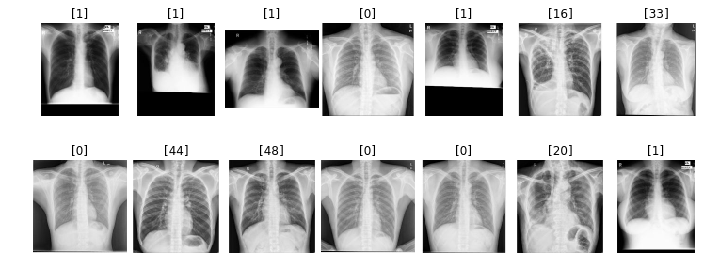

['normal' '' 'STB' 'NATB' 'TB' 'tuberculosis pleuritis' 'ATB'
 'PTB in the left lower field \t'
 'Bilateral secondary PTB , right pleural change after decortication \t'
 'bilateral PTB ?right pleurisy with pleural effusion \t'
 'PTB in the left upper field \t'
 'secondary PTB in the right upper field \t'
 'secondary PTB in the bilateral upper field \t'
 'PTB in the right upper field \t' 'bilateral PTB \t'
 'secondary PTB  in the right upper field \t'
 'bilateral PTB,right upper field atelectasis \t'
 'Bilateral secondary PTB   \t'
 'Bilateral secondary PTB, left encapsulated intrathoracic fluid \t'
 'PTB in the right lower field \t' 'Right PTB \t'
 'Left PTB, left pleural thickening  \t'
 'PTB in the bilateral upper and middle field \t'
 'Old PTB in the right upper field \t' 'left PTB,pleural thickening  \t'
 'bilateral PTB    \t' 'bilateral PTB, with left pleural effusion  \t'
 'PTB  in the right upper field \t' 'left PTB \t'
 'PTB in the bilateral upper field \t' 'left PTB,left pleur

In [29]:
rand_14 = np.random.randint(0, train_image.shape[0],14) #create an array of the given shape & populate it with random samples.
sample_image = train_image[rand_14]
sample_labels = train_labels[rand_14]
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01})#Amount of widhth and height reserved for for space between subplots
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_image[image_index])
        ax[r,c].set_title('%s' % sample_labels[image_index])
plt.show()
plt.close()
print(labels)

In [38]:
num_classes = len(labels)
train_labels_category = to_categorical(train_labels,num_classes)# transfer the no in vectors for using with models
test_labels_category = to_categorical(test_labels,num_classes)
train_labels_category.shape, test_labels_category.shape

((640, 82), (160, 82))

In [39]:
train_data = train_image
test_data = test_image
train_data.shape, test_data.shape

((640, 100, 100, 3), (160, 100, 100, 3))

In [40]:
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels_cat = train_labels_category[indexes]

# now we will set-aside val_perc% of the train_data
val_perc = 0.10
val_count = int(val_perc * len(train_data))
print(val_count)

# first pick validation set
val_data = train_data[:val_count,:]# val_count return objects containing counts of unique values.
val_labels_category = train_labels_category[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_category2 = train_labels_category[val_count:,:]

train_data2.shape, train_labels_category2.shape, val_data.shape, val_labels_category.shape, test_data.shape, test_labels_category.shape


64


((576, 100, 100, 3),
 (576, 82),
 (64, 100, 100, 3),
 (64, 82),
 (160, 100, 100, 3),
 (160, 82))

In [41]:
def show_plots(history):
    # Useful function to view plot of loss values & accuracies across the various epochs
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    y, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='blue',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals


In [42]:
def print_time_taken(start_time, end_time):
    sec_elapsed = end_time - start_time
    
    SEC_PER_MINUTE = 60
    SEC_PER_HOUR  = 60 * SEC_PER_MINUTE
    
    hour_elapsed, sec_elapsed = divmod(sec_elapsed, SEC_PER_HOUR)
    minute_elapsed, sec_elapsed = divmod(sec_elapsed, SEC_PER_MINUTE)
    
    if hour_elapsed > 0:
        print('Time taken: %d hour %d minute %d sec' % (hour_elapsed, minute_elapsed, sec_elapsed))
    elif minute_elapsed > 0:
        print('Time taken: %d minute %d sec' % (minute_elapsed, sec_elapsed))
    elif sec_elapsed > 1:
        print('Time taken: %d sec' % (sec_elapsed))
    else:
        print('Time taken - less than 1 sec')


def get_commonname(idx):
    sciname = labels[idx]
    return sciname

In [43]:
# to import keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image

In [44]:
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.25,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [67]:
# learning rate will decrease by 0.001 after each epoch
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.001 ** x)

# train
epochs = 30
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data2, train_labels_category2, batch_size=20),epochs = epochs, steps_per_epoch = train_data2.shape[0]/20,validation_data = (val_data, val_labels_category), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))

Epoch 1/30
29/28 [==============================] - ETA: 1:22 - loss: 2.9829 - acc: 0.250 - ETA: 1:13 - loss: 3.2695 - acc: 0.250 - ETA: 1:08 - loss: 3.2669 - acc: 0.250 - ETA: 1:04 - loss: 3.5386 - acc: 0.212 - ETA: 1:01 - loss: 3.5498 - acc: 0.240 - ETA: 58s - loss: 3.8338 - acc: 0.216 - ETA: 55s - loss: 3.8987 - acc: 0.21 - ETA: 53s - loss: 3.9377 - acc: 0.21 - ETA: 50s - loss: 4.0286 - acc: 0.21 - ETA: 47s - loss: 3.9698 - acc: 0.21 - ETA: 44s - loss: 3.9349 - acc: 0.20 - ETA: 42s - loss: 3.8473 - acc: 0.22 - ETA: 39s - loss: 3.7928 - acc: 0.23 - ETA: 36s - loss: 3.7118 - acc: 0.24 - ETA: 34s - loss: 3.6930 - acc: 0.26 - ETA: 31s - loss: 3.6271 - acc: 0.26 - ETA: 29s - loss: 3.6275 - acc: 0.27 - ETA: 26s - loss: 3.7134 - acc: 0.27 - ETA: 24s - loss: 3.7371 - acc: 0.27 - ETA: 21s - loss: 3.7691 - acc: 0.27 - ETA: 19s - loss: 3.7963 - acc: 0.27 - ETA: 16s - loss: 3.7900 - acc: 0.26 - ETA: 14s - loss: 3.7867 - acc: 0.26 - ETA: 11s - loss: 3.7963 - acc: 0.25 - ETA: 9s - loss: 3.7912 - 

29/28 [==============================] - ETA: 1:09 - loss: 3.6390 - acc: 0.400 - ETA: 1:06 - loss: 3.3794 - acc: 0.425 - ETA: 1:04 - loss: 3.2640 - acc: 0.350 - ETA: 1:01 - loss: 3.0673 - acc: 0.337 - ETA: 59s - loss: 2.9884 - acc: 0.350 - ETA: 56s - loss: 3.1675 - acc: 0.31 - ETA: 54s - loss: 3.3797 - acc: 0.30 - ETA: 51s - loss: 3.4649 - acc: 0.29 - ETA: 49s - loss: 3.9266 - acc: 0.27 - ETA: 46s - loss: 3.7707 - acc: 0.29 - ETA: 44s - loss: 3.7042 - acc: 0.30 - ETA: 41s - loss: 3.6180 - acc: 0.32 - ETA: 39s - loss: 3.7233 - acc: 0.31 - ETA: 36s - loss: 3.7448 - acc: 0.31 - ETA: 34s - loss: 3.6309 - acc: 0.33 - ETA: 31s - loss: 3.6164 - acc: 0.33 - ETA: 29s - loss: 3.5588 - acc: 0.33 - ETA: 26s - loss: 3.5505 - acc: 0.33 - ETA: 24s - loss: 3.5478 - acc: 0.33 - ETA: 21s - loss: 3.5115 - acc: 0.33 - ETA: 19s - loss: 3.5403 - acc: 0.33 - ETA: 16s - loss: 3.5573 - acc: 0.32 - ETA: 14s - loss: 3.5452 - acc: 0.33 - ETA: 11s - loss: 3.5070 - acc: 0.34 - ETA: 9s - loss: 3.4927 - acc: 0.3420 -

29/28 [==============================] - ETA: 1:08 - loss: 2.6347 - acc: 0.500 - ETA: 1:06 - loss: 3.0369 - acc: 0.400 - ETA: 1:05 - loss: 3.2919 - acc: 0.350 - ETA: 1:02 - loss: 3.3370 - acc: 0.325 - ETA: 1:00 - loss: 3.2044 - acc: 0.340 - ETA: 58s - loss: 3.2273 - acc: 0.316 - ETA: 55s - loss: 3.3639 - acc: 0.30 - ETA: 53s - loss: 3.4157 - acc: 0.29 - ETA: 51s - loss: 3.3757 - acc: 0.31 - ETA: 48s - loss: 3.3894 - acc: 0.31 - ETA: 45s - loss: 3.3473 - acc: 0.33 - ETA: 43s - loss: 3.4074 - acc: 0.33 - ETA: 40s - loss: 3.3043 - acc: 0.35 - ETA: 37s - loss: 3.3313 - acc: 0.35 - ETA: 35s - loss: 3.2724 - acc: 0.36 - ETA: 32s - loss: 3.2938 - acc: 0.35 - ETA: 29s - loss: 3.3002 - acc: 0.35 - ETA: 27s - loss: 3.3320 - acc: 0.34 - ETA: 24s - loss: 3.2976 - acc: 0.35 - ETA: 22s - loss: 3.3463 - acc: 0.34 - ETA: 19s - loss: 3.3250 - acc: 0.35 - ETA: 17s - loss: 3.3444 - acc: 0.34 - ETA: 14s - loss: 3.3415 - acc: 0.34 - ETA: 12s - loss: 3.3739 - acc: 0.34 - ETA: 9s - loss: 3.3890 - acc: 0.3480

29/28 [==============================] - ETA: 1:08 - loss: 3.3466 - acc: 0.150 - ETA: 1:06 - loss: 3.5489 - acc: 0.175 - ETA: 1:04 - loss: 3.3593 - acc: 0.183 - ETA: 1:01 - loss: 3.4674 - acc: 0.212 - ETA: 58s - loss: 3.2846 - acc: 0.220 - ETA: 56s - loss: 3.5067 - acc: 0.25 - ETA: 53s - loss: 3.5682 - acc: 0.27 - ETA: 51s - loss: 3.4360 - acc: 0.27 - ETA: 49s - loss: 3.3755 - acc: 0.26 - ETA: 46s - loss: 3.2485 - acc: 0.28 - ETA: 44s - loss: 3.3366 - acc: 0.27 - ETA: 41s - loss: 3.3835 - acc: 0.26 - ETA: 39s - loss: 3.4179 - acc: 0.26 - ETA: 36s - loss: 3.3338 - acc: 0.28 - ETA: 33s - loss: 3.2752 - acc: 0.29 - ETA: 31s - loss: 3.2773 - acc: 0.29 - ETA: 28s - loss: 3.2552 - acc: 0.30 - ETA: 26s - loss: 3.2830 - acc: 0.30 - ETA: 23s - loss: 3.3122 - acc: 0.30 - ETA: 21s - loss: 3.3030 - acc: 0.31 - ETA: 19s - loss: 3.2831 - acc: 0.31 - ETA: 16s - loss: 3.2428 - acc: 0.31 - ETA: 14s - loss: 3.2688 - acc: 0.31 - ETA: 11s - loss: 3.2443 - acc: 0.31 - ETA: 9s - loss: 3.3113 - acc: 0.3180 -

29/28 [==============================] - ETA: 1:08 - loss: 2.7469 - acc: 0.450 - ETA: 1:06 - loss: 2.9021 - acc: 0.375 - ETA: 1:04 - loss: 3.1766 - acc: 0.383 - ETA: 1:01 - loss: 2.9049 - acc: 0.437 - ETA: 59s - loss: 2.7872 - acc: 0.430 - ETA: 57s - loss: 3.2461 - acc: 0.38 - ETA: 54s - loss: 3.4078 - acc: 0.36 - ETA: 51s - loss: 3.6093 - acc: 0.35 - ETA: 49s - loss: 3.4731 - acc: 0.36 - ETA: 47s - loss: 3.5390 - acc: 0.36 - ETA: 44s - loss: 3.5194 - acc: 0.35 - ETA: 42s - loss: 3.6828 - acc: 0.34 - ETA: 39s - loss: 3.6017 - acc: 0.34 - ETA: 36s - loss: 3.5306 - acc: 0.34 - ETA: 34s - loss: 3.6173 - acc: 0.32 - ETA: 31s - loss: 3.5938 - acc: 0.33 - ETA: 29s - loss: 3.5919 - acc: 0.32 - ETA: 26s - loss: 3.5876 - acc: 0.33 - ETA: 24s - loss: 3.6465 - acc: 0.32 - ETA: 21s - loss: 3.5717 - acc: 0.33 - ETA: 19s - loss: 3.5743 - acc: 0.33 - ETA: 16s - loss: 3.5649 - acc: 0.33 - ETA: 14s - loss: 3.5613 - acc: 0.33 - ETA: 11s - loss: 3.5681 - acc: 0.32 - ETA: 9s - loss: 3.5369 - acc: 0.3300 -

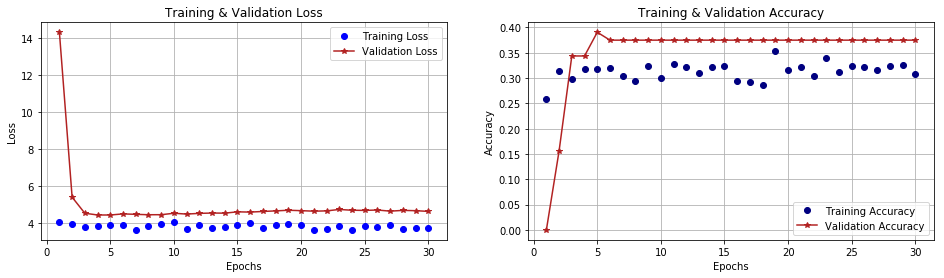

In [63]:
show_plots(history.history)

In [64]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_category, batch_size=24)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

160/160 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 19ms/step
Test loss: 5.3003 accuracy: 0.3875


In [65]:
def get_commonname(idx):
    sciname = labels[idx]
    return sciname

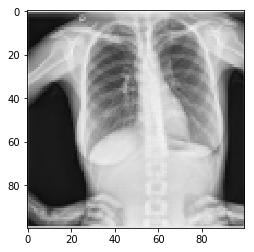

original: ['secondary PTB  in the bilateral upper field \t']
predicted: ['normal']


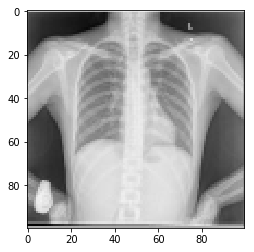

original: ['normal']
predicted: ['normal']


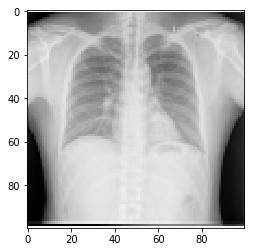

original: ['normal']
predicted: ['normal']


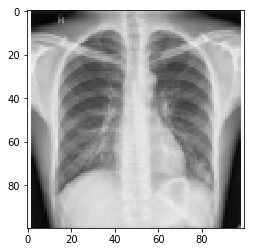

original: ['STB']
predicted: ['normal']


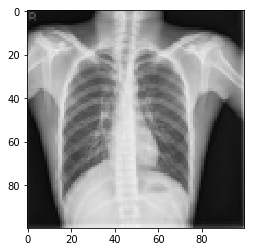

original: ['normal']
predicted: ['normal']


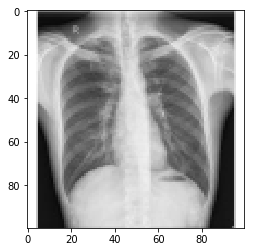

original: ['right upper PTB \t']
predicted: ['normal']


In [68]:
tb_list = [80,100,13,54,16,15]
for i in tb_list:

    img = test_data[i]
    plt.imshow(img)
    plt.show()
    predicted = model.predict_classes(img.reshape(-1,100,100,3))
    original =  test_labels[i]
    print(f'original: {get_commonname(original)}')
    print(f'predicted: {get_commonname(predicted)}')